# Project 6 - Data Analytics and Machine Learning for Store DataSet
# Ahmed Khaled
<a id='home'></a>
## Table of Contents
<ul>
<li><a href="#intro">Data Overview</a></li>
<li><a href="#wrangling">Data Preparation (Data Wrangling) and Data Preprocessing</a></li>
<li><a href="#feature">Feature Engineering</a></li>
<li><a href="#EDA">EDA</a></li>
<li><a href="#visualization"> Questions and Visualization</a></li>
</ul>

<a id='intro'></a>
# Data Overview
<a href="#home">Home</a>

# 1- Import Libraries

In [1]:

#Machine learning
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

from tqdm import tqdm   # print  the level of iterator (counter)  # Process bar

import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
from datetime import datetime
import re
from wordcloud import WordCloud

In [2]:
pd.set_option('display.max_rows', 550)   # print only 550 rows
pd.set_option('display.max_columns', 500) # print only 500 rows
pd.set_option('display.width', 1000)   # print only 1000 width
pd.options.display.float_format = '{:,.2f}'.format   # print only format like 5.021231 >>  5.02  (precision = 2)

plt.rcParams['figure.figsize'] = (15,10)  # setup figsize
plt.rcParams['axes.grid'] = True  #remove axis

# 1- Reading Data

In [3]:
filename = 'D:\Superstar.csv'
raw_df = pd.read_csv(filename, encoding='latin-1', parse_dates= ['Order Date'])

In [4]:
df = raw_df.copy()

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High
3,11731,IT-2011-3647632,2011-01-01,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.05,4.82,High
4,22255,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium


In [6]:
df.columns = df.columns.str.replace(' ', '_')

In [7]:
df.head(0)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Country,Postal_Code,Market,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority


In [8]:
df.shape

(51290, 24)

This dataframe originally contains 51290 records and 24 features.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row_ID          51290 non-null  int64         
 1   Order_ID        51290 non-null  object        
 2   Order_Date      51290 non-null  datetime64[ns]
 3   Ship_Date       51290 non-null  object        
 4   Ship_Mode       51290 non-null  object        
 5   Customer_ID     51290 non-null  object        
 6   Customer_Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal_Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product_ID      51290 non-null  object        
 15  Ca

In [10]:
print(df.dtypes)

Row_ID                     int64
Order_ID                  object
Order_Date        datetime64[ns]
Ship_Date                 object
Ship_Mode                 object
Customer_ID               object
Customer_Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal_Code              float64
Market                    object
Region                    object
Product_ID                object
Category                  object
Sub-Category              object
Product_Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping_Cost            float64
Order_Priority            object
dtype: object


<a id='wrangling'></a>
# Data Preparation (Data Wrangling) and Data Preprocessing
<a href="#home">Home</a>

## 1 - Nulls Treatment

<Axes: >

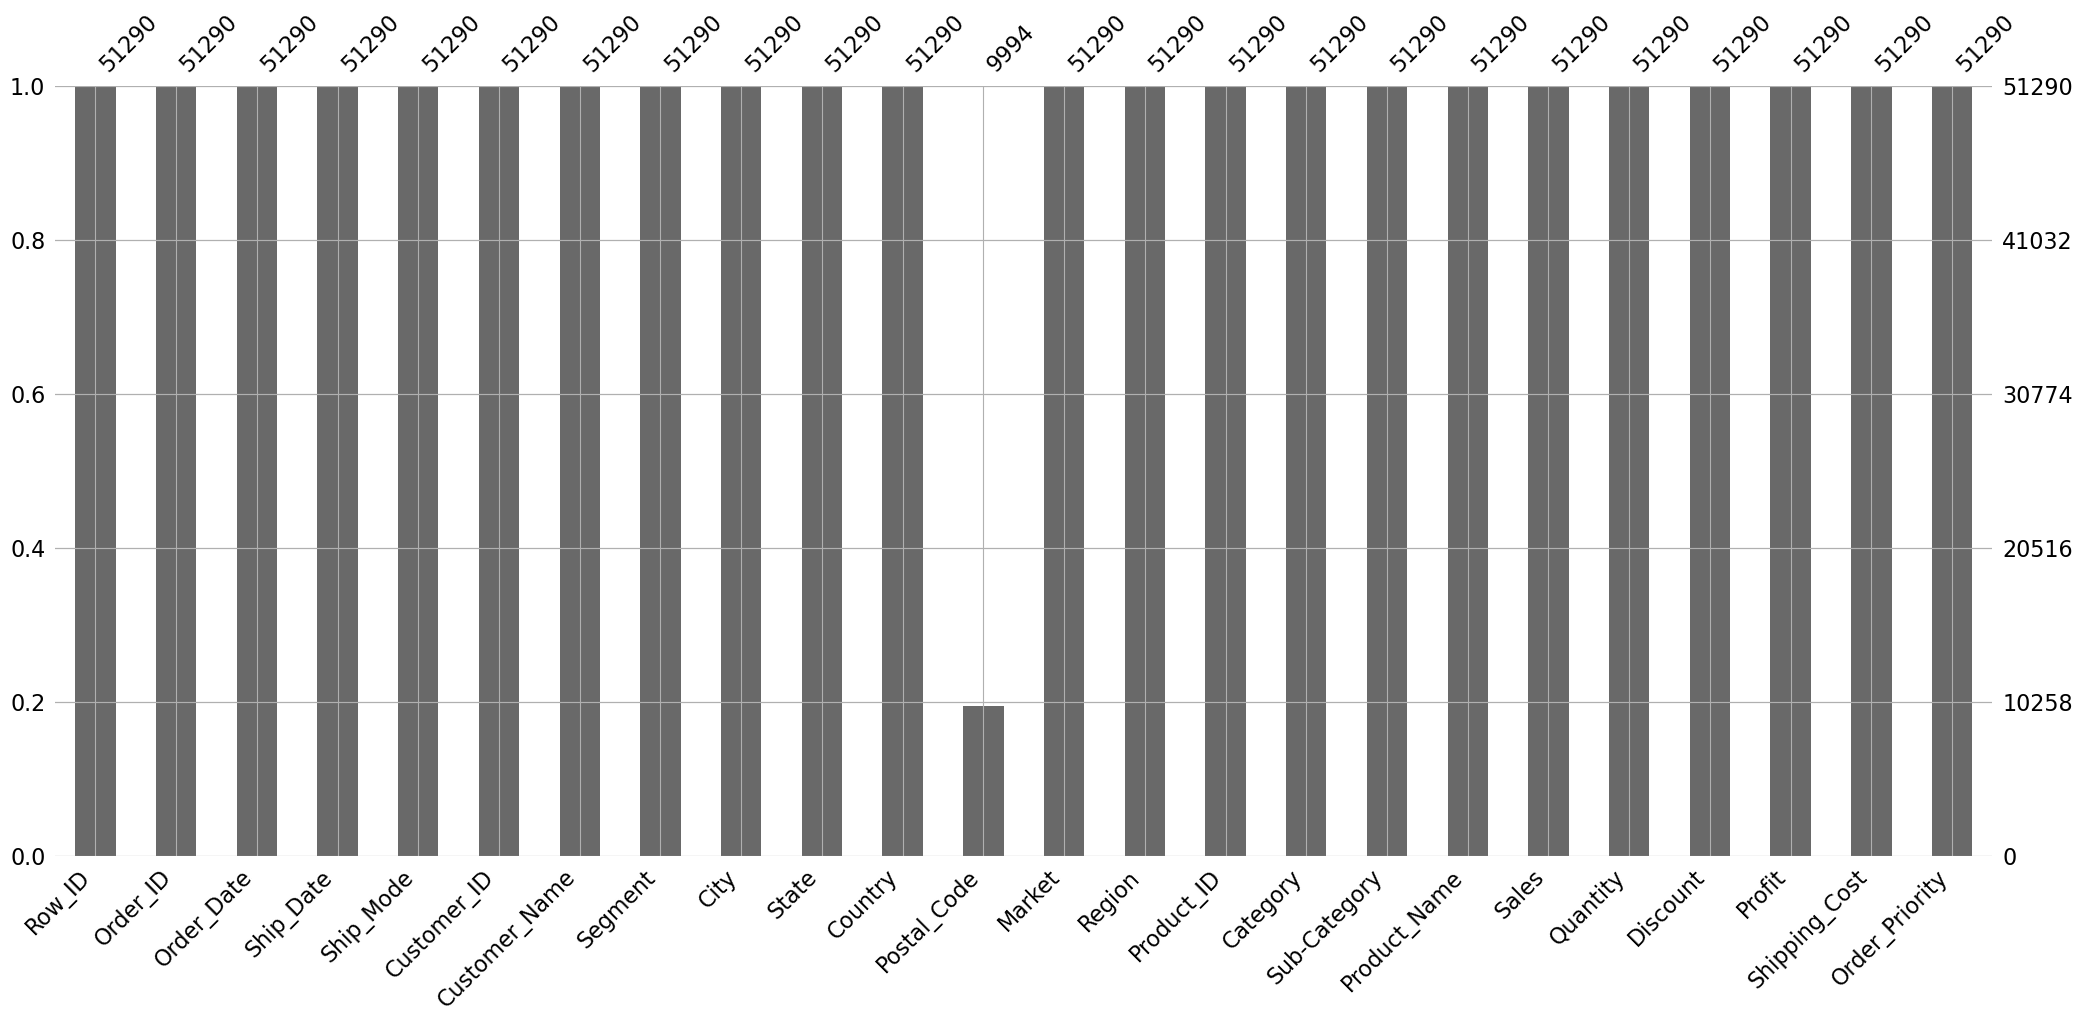

In [11]:
import missingno as msno
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

msno.bar(df)

<Axes: >

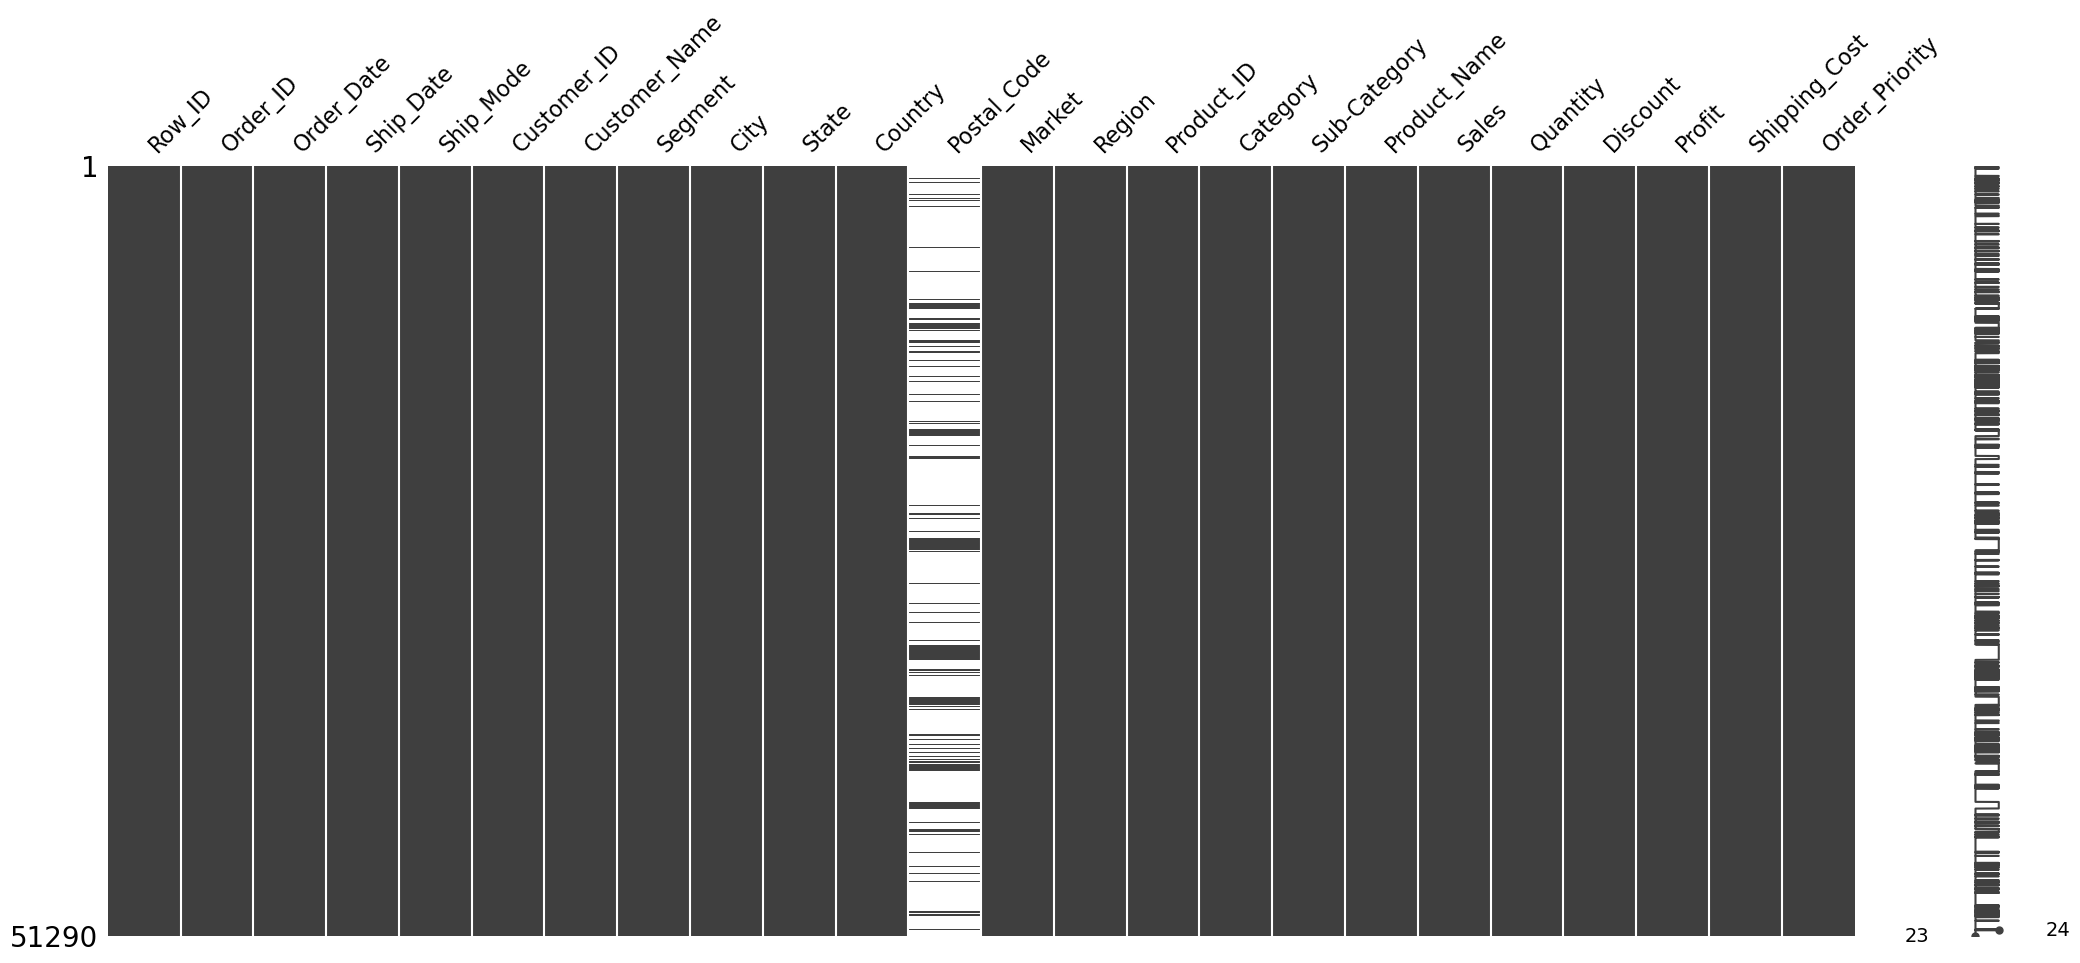

In [12]:
msno.matrix(df.sort_values(by='City'))

In [13]:
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False)

,Total missing,% missing
Postal_Code,41296,80.51
Row_ID,0,0.00
Region,0,0.00
Shipping_Cost,0,0.00
Profit,0,0.00
Discount,0,0.00
Quantity,0,0.00
Sales,0,0.00
Product_Name,0,0.00
Sub-Category,0,0.00


In [14]:
df.query("City == 'Carrollton'").head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Country,Postal_Code,Market,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
3491,41201,CA-2011-122609,2011-12-11,18/11/2011,Standard Class,DP-13000,Darren Powers,Consumer,Carrollton,Texas,United States,"75,007.00",US,Central,TEC-AC-10002567,Technology,Accessories,Logitech G602 Wireless Gaming Mouse,127.98,2,0.20,25.60,7.17,Medium
3498,41200,CA-2011-122609,2011-12-11,18/11/2011,Standard Class,DP-13000,Darren Powers,Consumer,Carrollton,Texas,United States,"75,007.00",US,Central,FUR-FU-10004587,Furniture,Furnishings,"GE General Use Halogen Bulbs, 100 Watts, 1 Bul...",25.13,3,0.60,-6.91,2.20,Medium
15781,36539,CA-2014-146367,2014-05-08,9/8/2014,Standard Class,HM-14860,Harry Marie,Corporate,Carrollton,Texas,United States,"75,007.00",US,Central,OFF-BI-10002827,Office Supplies,Binders,Avery Durable Poly Binders,3.32,3,0.80,-5.64,0.21,Medium
20876,33869,CA-2013-155845,2013-08-13,16/08/2013,Second Class,CM-12235,Chris McAfee,Consumer,Carrollton,Texas,United States,"75,007.00",US,Central,TEC-AC-10004145,Technology,Accessories,Logitech diNovo Edge Keyboard,"1,399.94",7,0.20,52.50,273.79,High
30530,37332,US-2012-155369,2012-04-19,25/04/2012,Standard Class,PG-18820,Patrick Gardner,Consumer,Carrollton,Texas,United States,"75,007.00",US,Central,OFF-BI-10003925,Office Supplies,Binders,Fellowes PB300 Plastic Comb Binding Machine,310.39,4,0.80,-512.15,6.30,Medium


In [15]:
df.query("State == 'Texas'").head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Country,Postal_Code,Market,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
34,39607,CA-2011-168312,2011-01-03,7/3/2011,Standard Class,GW-14605,Giulietta Weimer,Consumer,Houston,Texas,United States,"77,036.00",US,Central,FUR-TA-10001866,Furniture,Tables,Bevis Round Conference Room Tables and Bases,376.51,3,0.30,-43.03,32.70,Medium
36,39245,CA-2011-131009,2011-01-03,5/3/2011,Standard Class,SC-20380,Shahid Collister,Consumer,El Paso,Texas,United States,"79,907.00",US,Central,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,362.25,6,0.30,0.00,25.22,Medium
49,39606,CA-2011-168312,2011-01-03,7/3/2011,Standard Class,GW-14605,Giulietta Weimer,Consumer,Houston,Texas,United States,"77,036.00",US,Central,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,137.35,3,0.20,8.58,8.49,Medium
52,39247,CA-2011-131009,2011-01-03,5/3/2011,Standard Class,SC-20380,Shahid Collister,Consumer,El Paso,Texas,United States,"79,907.00",US,Central,OFF-ST-10001469,Office Supplies,Storage,Fellowes Bankers Box Recycled Super Stor/Drawer,129.55,3,0.20,-22.67,8.00,Medium
53,39246,CA-2011-131009,2011-01-03,5/3/2011,Standard Class,SC-20380,Shahid Collister,Consumer,El Paso,Texas,United States,"79,907.00",US,Central,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.55,6,0.60,-34.95,7.38,Medium


In [16]:
df['Postal_Code'].value_counts().count()

631

In [17]:
Postal_Code_df = df[['City', 'Postal_Code']].copy()
Postal_Code_df.head()

,City,Postal_Code
0,Constantine,NaN
1,Wagga Wagga,NaN
2,Budapest,NaN
3,Stockholm,NaN
4,Wagga Wagga,NaN


In [18]:
Postal_Code_df.isnull().count()

City           51290
Postal_Code    51290
dtype: int64

In [19]:
Postal_Code_dict = dict(Postal_Code_df.values)
df.Postal_Code = df.Postal_Code.fillna(df.City.map(Postal_Code_dict))
Postal_Code_dict

{'Constantine': nan,
 'Wagga Wagga': nan,
 'Budapest': nan,
 'Stockholm': nan,
 'Dhaka': nan,
 'Mission Viejo': 92691.0,
 'Luanda': nan,
 'Yingcheng': nan,
 'Chongqing': nan,
 'San Miguelito': nan,
 'Mashhad': nan,
 'La Rochelle': nan,
 'Parma': nan,
 'Halle': nan,
 'Toronto': nan,
 'Farnborough': nan,
 'Vinnytsya': nan,
 'Berlin': nan,
 'Elmhurst': 60126.0,
 'Adelaide': nan,
 'Seattle': 98115.0,
 'Houston': 77070.0,
 'El Paso': 79907.0,
 'Kherson': nan,
 'Colmar': nan,
 'Handa': nan,
 'Palembang': nan,
 'Hobart': nan,
 'Bochum': nan,
 'Melbourne': nan,
 'Rome': nan,
 'Kano': nan,
 'New York City': 10009.0,
 'Treviso': nan,
 'Aew?l-li': nan,
 'Lima': nan,
 'Manila': nan,
 'Arraiján': nan,
 'Bogotá': nan,
 'Vallejo': 94591.0,
 'Revere': 2151.0,
 'Denpasar': nan,
 'Cork': nan,
 'Lakeville': 55044.0,
 'Little Rock': 72209.0,
 'Warrington': nan,
 'Matagalpa': nan,
 'Zapopan': nan,
 'Joinville': nan,
 'Puebla': nan,
 'Lyon': nan,
 'Istanbul': nan,
 'Deuil-la-Barre': nan,
 'Mexico City': nan

In [20]:
df.isnull().sum()

Row_ID                0
Order_ID              0
Order_Date            0
Ship_Date             0
Ship_Mode             0
Customer_ID           0
Customer_Name         0
Segment               0
City                  0
State                 0
Country               0
Postal_Code       41119
Market                0
Region                0
Product_ID            0
Category              0
Sub-Category          0
Product_Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping_Cost         0
Order_Priority        0
dtype: int64

In [21]:
df = df.drop(['Postal_Code'], axis=1)

In [22]:
df.shape

(51290, 23)

I have decided to remove the Postal_Code feature as it has too many Nan values.

## 2 - Duplicates Treatment

In [23]:
df.duplicated().sum()

0

There are no duplicate records.

In [24]:
df.duplicated(subset=['Order_ID']).sum()

26255

Those duplicate order ID are the same order that includes multiple products.

<a id='feature'></a>
# Feature Engineering
<a href="#home">Home</a>

In [25]:
df['Price_Each'] = (df['Sales'] / (df['Quantity']*(1-df['Discount'])))
df['Price_Each'] = df['Price_Each'].apply(lambda x: round(x, 3))

In [26]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Country,Market,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Price_Each
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium,204.15
1,22253,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium,44.58
2,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High,16.53
3,11731,IT-2011-3647632,2011-01-01,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.05,4.82,High,29.91
4,22255,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium,25.26


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row_ID          51290 non-null  int64         
 1   Order_ID        51290 non-null  object        
 2   Order_Date      51290 non-null  datetime64[ns]
 3   Ship_Date       51290 non-null  object        
 4   Ship_Mode       51290 non-null  object        
 5   Customer_ID     51290 non-null  object        
 6   Customer_Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product_ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

In [28]:
df['Day_Name'] = df['Order_Date'].dt.day_name()
df['Month'] = df['Order_Date'].dt.month_name()
df['Year'] = df['Order_Date'].dt.year

In [29]:
print(df.dtypes)

Row_ID                     int64
Order_ID                  object
Order_Date        datetime64[ns]
Ship_Date                 object
Ship_Mode                 object
Customer_ID               object
Customer_Name             object
Segment                   object
City                      object
State                     object
Country                   object
Market                    object
Region                    object
Product_ID                object
Category                  object
Sub-Category              object
Product_Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping_Cost            float64
Order_Priority            object
Price_Each               float64
Day_Name                  object
Month                     object
Year                       int64
dtype: object


In [30]:
quarters = {
    'Quarter1': ['January', 'February', 'March'],
    'Quarter2': ['April', 'May', 'June'],
    'Quarter3': [ 'July', 'August', 'September'],
    'Quarter4': ['October', 'November', 'December']
}

def month_to_quarter(month):
    for quarter, months in quarters.items():
        if month in months:
            return quarter

df['Quarter'] = df['Month'].apply(month_to_quarter)

In [31]:
seasons = {
    'Winter': ['December', 'January', 'February'],
    'Spring': ['March', 'April', 'May'],
    'Summer': ['June', 'July', 'August'],
    'Autumn': ['September', 'October', 'November']
}

def month_to_season(month):
    for season, months in seasons.items():
        if month in months:
            return season

df['Season'] = df['Month'].apply(month_to_season)

In [32]:
df.head(1)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Country,Market,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Price_Each,Day_Name,Month,Year,Quarter,Season
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium,204.15,Saturday,January,2011,Quarter1,Winter


In [33]:
df.shape

(51290, 29)

<a id='EDA'></a>
# EDA
<a href="#home">Home</a>

In [34]:
df['Year'].value_counts()
df['Month'].value_counts()
df['Day_Name'].value_counts()

2014    17531
2013    13799
2012    10962
2011     8998
Name: Year, dtype: int64

November     5660
December     5534
September    5237
June         4892
August       4715
October      4467
May          3938
March        3728
July         3571
April        3499
January      3122
February     2927
Name: Month, dtype: int64

Friday       8745
Tuesday      8654
Monday       8424
Thursday     8262
Wednesday    8203
Saturday     5639
Sunday       3363
Name: Day_Name, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row_ID          51290 non-null  int64         
 1   Order_ID        51290 non-null  object        
 2   Order_Date      51290 non-null  datetime64[ns]
 3   Ship_Date       51290 non-null  object        
 4   Ship_Mode       51290 non-null  object        
 5   Customer_ID     51290 non-null  object        
 6   Customer_Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product_ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

In [36]:
df['Day_Name'] = df['Day_Name'].astype('category')
df['Month'] = df['Month'].astype('category')
df['Quarter'] = df['Quarter'].astype('category')
df['Season'] = df['Season'].astype('category')
df['Category'] = df['Category'].astype('category')

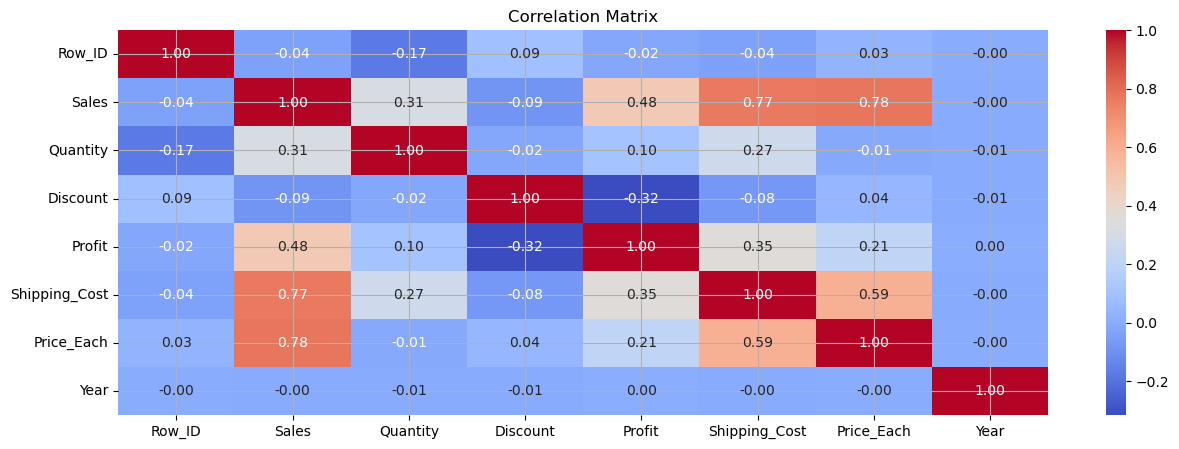

In [37]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(numeric_only = True),annot=True,cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show();

<a id='visualization'></a>
# Questions and Visualization
<a href="#home">Home</a>

# 1- Product/Profit/Price ##

1. Most/Least sold products? 
2. Which products are most profit generating? 
3. How many products are on sale? 
4. What is our most expensive or cheapest product we sell? 
5. Do certain countries prefer certain category of products? 
6. Which product types get critical & high priority? 
7. Work out profitability on Gross Price, any seasonality ? 
8. Do corporate customers buy all category of products or just one type…. cross selling? 
9. What is the relation between order quantity and profit? 
10. Which state generates the most profits? 
11. Are prices the same in all countries/different websites? 
12. What is the pricing model? 
13. Which products are most heavily discounted? 
14. Does one customer have a few different shipping modes, and can we see the price variance? 

## 1. Most/Least sold products? 

In [38]:
df.groupby('Product_Name')['Quantity'].sum().idxmax()

'Staples'

In [39]:
df.groupby('Product_Name')['Quantity'].sum().sort_values()

Product_Name
Penpower WorldCard Pro Card Scanner                                            1
Boston 1900 Electric Pencil Sharpener                                          1
Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order      1
Chromcraft Training Table, Adjustable Height                                   1
Xerox 20                                                                       1
                                                                            ... 
Sanford Pencil Sharpener, Water Color                                        259
Rogers File Cart, Single Width                                               262
Eldon File Cart, Single Width                                                321
Cardinal Index Tab, Clear                                                    337
Staples                                                                      876
Name: Quantity, Length: 3788, dtype: int64

In [40]:
df.groupby('Product_Name')['Quantity'].sum().max()

876

Most product sold is Staples with 876 units. 

## 2. Which products are most profit generating? 

In [41]:
df.groupby('Product_Name')['Profit'].sum().nlargest(5)

Product_Name
Canon imageCLASS 2200 Advanced Copier   25,199.93
Cisco Smart Phone, Full Size            17,238.52
Motorola Smart Phone, Full Size         17,027.11
Hoover Stove, Red                       11,807.97
Sauder Classic Bookcase, Traditional    10,672.07
Name: Profit, dtype: float64

Canon imageCLASS 2200 Advanced Copier is the most profitable (25,199.93).

## 3. How many products are on sale? 

In [42]:
dicounted_products = len(df.query("Discount != 0.00")["Product_Name"].unique())
dicounted_products

3592

In [43]:
unique_products = df['Product_Name'].nunique()
unique_products

3788

In [44]:
(dicounted_products / unique_products) * 100

94.82576557550159

There are 3592 products that are on sale out of 3788 (94.83%)

## 4. What is our most expensive or cheapest product we sell? 

In [45]:
df['Product_Name'].iloc[df['Price_Each'].idxmax()] + ' | Price ' + str(df["Price_Each"].max())

'Cisco TelePresence System EX90 Videoconferencing Unit | Price 7546.16'

In [46]:
df['Product_Name'].iloc[df['Price_Each'].idxmin()] + ' | Price ' + str(df["Price_Each"].min())

'Maxell 4.7GB DVD+R 5/Pack | Price 0.99'

## 5. Do certain countries prefer certain category of products? 

In [47]:
df['City'].nunique()

3636

In [48]:
df.query("Country == 'France'").pivot_table(index=['Country', 'Category'], values = ['Quantity'], aggfunc = 'sum')

Quantity
Country Category                 
France  Furniture            1633
        Office Supplies      7091
        Technology           2080

In [49]:
x = df.pivot_table(index=['Country', 'Category'], values = ['Quantity'], aggfunc = 'sum')
x

Quantity
Country                          Category                 
Afghanistan                      Furniture              43
                                 Office Supplies       133
                                 Technology             52
Albania                          Furniture               3
                                 Office Supplies        21
                                 Technology             16
Algeria                          Furniture              45
                                 Office Supplies       333
                                 Technology             76
Angola                           Furniture              46
                                 Office Supplies       221
                                 Technology             50
Argentina                        Furniture             348
                                 Office Supplies       865
                                 Technology            291
Armenia                          Furniture               2
                                 Office Supplies         1
                                 Technology              0
Australia                        Furniture            2265
                                 Office Supplies      6008
                                 Technology           2400
Austria                          Furniture             165
                                 Office Supplies       753
                                 Technology            230
Azerbaijan                       Furniture               8
                                 Office Supplies        36
                                 Technology             10
Bahrain                          Furniture               0
                                 Office Supplies         4
                                 Technology              2
Bangladesh                       Furniture             179
                                 Office Supplies       361
                                 Technology            140
Barbados                         Furniture              13
                                 Office Supplies        35
                                 Technology             28
Belarus                          Furniture              27
                                 Office Supplies       122
                                 Technology             29
Belgium                          Furniture              76
                                 Office Supplies       390
                                 Technology            109
Benin                            Furniture               2
                                 Office Supplies        43
                                 Technology             21
Bolivia                          Furniture              49
                                 Office Supplies        87
                                 Technology             38
Bosnia and Herzegovina           Furniture               8
                                 Office Supplies        32
                                 Technology             10
Brazil                           Furniture            1479
                                 Office Supplies      3390
                                 Technology           1279
Bulgaria                         Furniture              30
                                 Office Supplies       112
                                 Technology             32
Burundi                          Furniture               4
                                 Office Supplies         0
                                 Technology              0
Cambodia                         Furniture              51
                                 Office Supplies        64
                                 Technology             39
Cameroon                         Furniture              36
                                 Office Supplies       138
                                 Technology             54
Canada                           Furni

## 6. Which product types get critical & high priority? 

In [50]:
df.query("Order_Priority=='High' | Order_Priority=='Critical'").groupby('Category')['Order_Priority'].value_counts()

Category         Order_Priority
Furniture        High              2931
                 Critical           722
Office Supplies  High              9466
                 Critical          2446
Technology       High              3104
                 Critical           764
Name: Order_Priority, dtype: int64

In [51]:
df.groupby('Category')['Order_Priority'].value_counts()

Category         Order_Priority
Furniture        Medium             5746
                 High               2931
                 Critical            722
                 Low                 477
Office Supplies  Medium            17874
                 High               9466
                 Critical           2446
                 Low                1487
Technology       Medium             5813
                 High               3104
                 Critical            764
                 Low                 460
Name: Order_Priority, dtype: int64

<Figure size 1000x500 with 0 Axes>

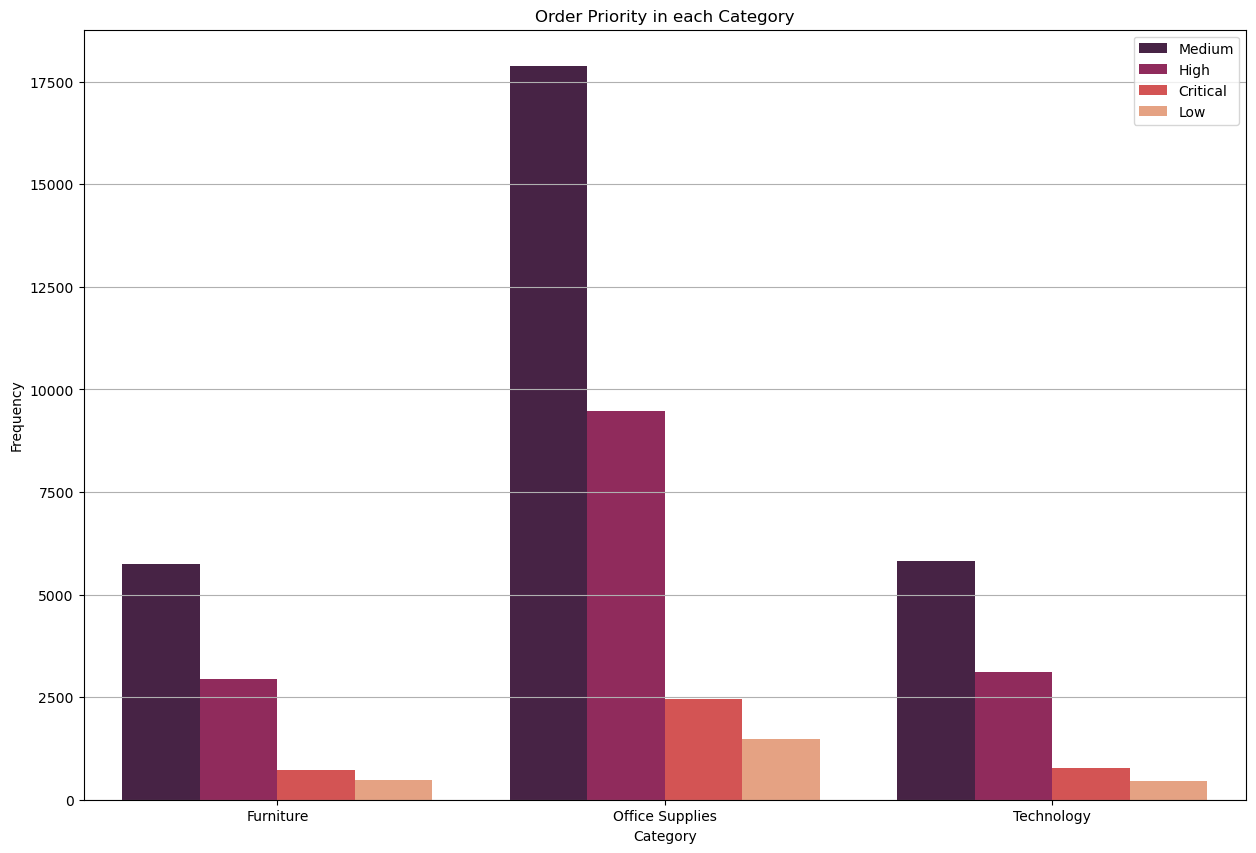

In [52]:
plt.figure(figsize=(10, 5))
fig, ax = plt.subplots()
sns.countplot(x = 'Category', hue='Order_Priority', data=df, palette = "rocket") 
plt.xlabel('Category') 
plt.ylabel('Frequency') 
plt.title('Order Priority in each Category') 
ax.legend(loc='upper right', shadow=False, fontsize='medium')
plt.show();

All orders in each category prioritize Medium Priority then High then Critical then low.

## 7. Work out profitability on Gross Price, any seasonality ? 

## 8. Do corporate customers buy all category of products or just one type…. cross selling? 

In [53]:
df['Segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [54]:
df.query("Segment == 'Corporate'")['Customer_ID'].nunique()

476

In [55]:
df.query("Segment == 'Corporate'").groupby('Customer_ID')['Category'].value_counts()

Customer_ID  Category       
AB-10600     Office Supplies    23
             Furniture           8
             Technology          7
AB-600       Office Supplies    17
             Technology          5
                                ..
YS-11880     Technology          3
             Furniture           1
YS-21880     Office Supplies    36
             Furniture           9
             Technology          9
Name: Category, Length: 1428, dtype: int64

It differs where some corporate customers buy a varied amount from each Category.

## 9. What is the relation between order quantity and profit? 

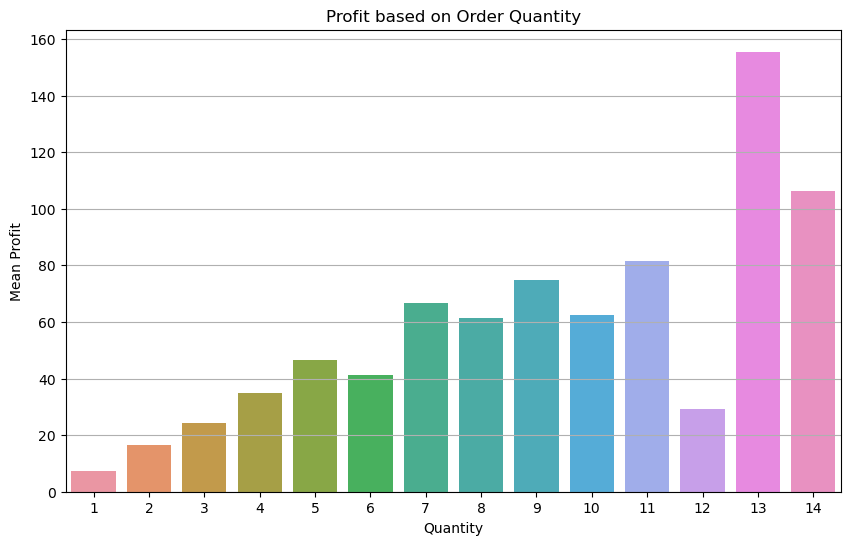

In [56]:
order_quantity_profit = df.groupby('Quantity')['Profit'].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=order_quantity_profit.index, y=order_quantity_profit.values)
plt.title('Profit based on Order Quantity')
plt.xlabel('Quantity')
plt.ylabel('Mean Profit')
plt.show();

Generally, as orders have more quantity the mean profit increases excpect for Quantity = 12 as it is relatively low.

## 10. Which state generates the most profits? 

In [57]:
df.groupby('State')['Profit'].sum().nlargest(5)

State
England           99,907.73
California        76,381.39
New York          74,038.55
Ile-de-France     44,055.92
New South Wales   43,695.98
Name: Profit, dtype: float64

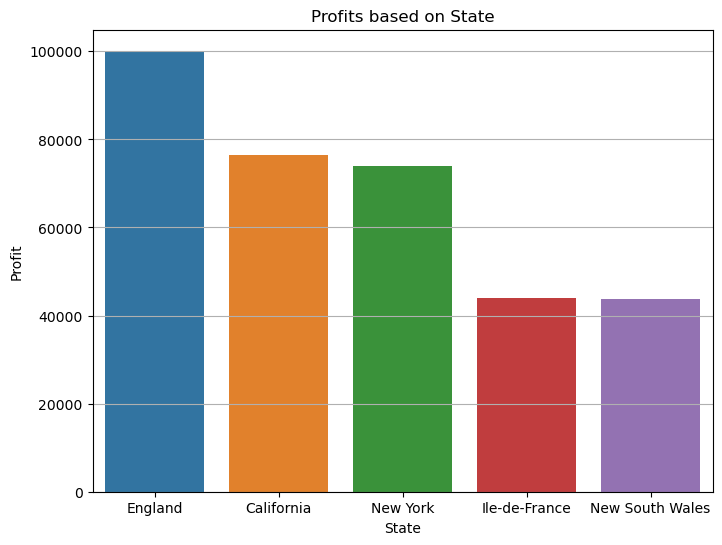

In [58]:
profit_by_state = df.groupby('State')['Profit'].sum().nlargest(5)
plt.figure(figsize=(8,6))
sns.barplot(x=profit_by_state.index, y=profit_by_state.values)
plt.title('Profits based on State')
plt.xlabel('State')
plt.ylabel('Profit')
plt.show();

England bring in the most profit with 99,907.73

## 11. Are prices the same in all countries/different websites? 

In [59]:
table = df.query("Product_Name== 'Acme Box Cutter, High Speed'").pivot_table(df, index=['Country', 'Product_Name']).sort_values(by=['Price_Each'])
table

,,Discount,Price_Each,Profit,Quantity,Row_ID,Sales,Shipping_Cost,Year
Country,Product_Name,,,,,,,,
Cuba,"Acme Box Cutter, High Speed",0.00,25.20,25.20,2.00,"6,818.00",50.40,2.07,"2,011.00"
El Salvador,"Acme Box Cutter, High Speed",0.00,25.20,75.60,6.00,"4,041.00",151.20,10.79,"2,014.00"
Guatemala,"Acme Box Cutter, High Speed",0.00,25.20,75.60,6.00,"7,522.00",151.20,9.66,"2,014.00"
Haiti,"Acme Box Cutter, High Speed",0.40,25.20,8.82,3.50,"6,876.00",52.92,7.08,"2,013.50"
Mexico,"Acme Box Cutter, High Speed",0.00,25.20,12.60,1.00,"9,772.00",25.20,1.38,"2,014.00"
Afghanistan,"Acme Box Cutter, High Speed",0.00,37.80,46.80,4.00,"25,231.00",151.20,10.35,"2,012.00"
Australia,"Acme Box Cutter, High Speed",0.10,37.80,39.60,5.00,"24,645.00",170.10,8.35,"2,013.00"
Austria,"Acme Box Cutter, High Speed",0.00,37.80,54.36,3.00,"14,505.00",113.40,17.89,"2,014.00"
China,"Acme Box Cutter, High Speed",0.00,37.80,35.10,3.00,"25,083.00",113.40,13.93,"2,014.00"


Pricing of a product is different according to different countries and regions.

We can use this query to check a specific product and its pricing model in different countries.

## 12. What is the pricing model? 

In [60]:
product_price_df = df[['Product_Name', 'Price_Each']].copy()
product_price_df.head()

,Product_Name,Price_Each
0,"Tenex Lockers, Blue",204.15
1,"Acme Trimmer, High Speed",44.58
2,"Tenex Box, Single Width",16.53
3,"Enermax Note Cards, Premium",29.91
4,"Eldon Light Bulb, Duo Pack",25.26


In [61]:
df['Product_Name'].nunique()

3788

In [62]:
df.head(1)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Country,Market,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Price_Each,Day_Name,Month,Year,Quarter,Season
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium,204.15,Saturday,January,2011,Quarter1,Winter


In [63]:
df['Product_ID'].nunique()

10292

In [64]:
df1 = pd.DataFrame(df['Product_ID'].unique())
df1.head()

,0
0,OFF-TEN-10000025
1,OFF-SU-10000618
2,OFF-TEN-10001585
3,OFF-PA-10001492
4,FUR-FU-10003447


In [65]:
df['Product_ID'].value_counts()

OFF-AR-10003651     35
OFF-AR-10003829     31
OFF-BI-10002799     30
OFF-BI-10003708     30
FUR-CH-10003354     28
                    ..
OFF-OIC-10004622     1
OFF-EN-10004254      1
OFF-SU-10003659      1
FUR-FU-10002930      1
FUR-BO-10001746      1
Name: Product_ID, Length: 10292, dtype: int64

In [66]:
product_price_df.shape

(51290, 2)

In [67]:
product_price_df = product_price_df.drop_duplicates(keep='last')

In [68]:
product_price_df.shape

(5872, 2)

In [69]:
product_price_dict = dict(product_price_df.values)
product_price_dict

{'Bevis Round Conference Room Tables and Bases': 179.29,
 'Sterling Rubber Bands by Alliance': 4.71,
 'Hon Wood Table, with Bottom Storage': 531.33,
 'Hoover Coffee Grinder, Silver': 69.54,
 'Panasonic Calculator, White': 48.69,
 'Konica Printer, Red': 264.99,
 'Chromcraft Training Table, Adjustable Height': 190.72,
 'Stockwell Staples, 12 Pack': 9.84,
 'Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier': 1995.99,
 'Hewlett-Packard Deskjet D4360 Printer': 139.99,
 'Hunt BOSTON Model 1606 High-Volume Electric Pencil Sharpener, Beige': 173.91,
 'AT&T EL51110 DECT': 125.99,
 'Barricks Wood Table, Fully Assembled': 345.6,
 'Hon Deluxe Fabric Upholstered Stacking Chairs, Squared Back': 243.98,
 'Hamilton Beach Toaster, Silver': 58.26,
 'Barricks Computer Table, with Bottom Storage': 480.03,
 'Epson Printer, Wireless': 262.62,
 'Hewlett-Packard Deskjet F4180 All-in-One Color Ink-jet - Printer / copier / scanner': 169.99,
 'KitchenAid Coffee Grinder, Black': 69.9,
 'Motoro

## 13. Which products are most heavily discounted? 

In [70]:
df.query("Discount > 0.50")['Product_Name'].value_counts()

Rogers File Cart, Single Width                     11
Smead Lockers, Single Width                        11
Stockwell Thumb Tacks, Metal                        9
Avery Index Tab, Clear                              9
Acco Index Tab, Clear                               9
                                                   ..
DYMO CardScan Personal V9 Business Card Scanner     1
Eaton Memo Slips, 8.5 x 11                          1
Brother Fax and Copier, Digital                     1
Hoover Toaster, Red                                 1
SanDisk Keyboard, Bluetooth                         1
Name: Product_Name, Length: 1861, dtype: int64

Rogers File Cart, Single Width and Smead Lockers, Single Width are the most heavily discounted products.

## 14. Does one customer have a few different shipping modes, and can we see the price variance? 

In [71]:
df['Customer_ID'].value_counts()

PO-18850    97
BE-11335    94
JG-15805    90
SW-20755    89
MY-18295    85
            ..
MG-7650      1
MG-7890      1
DK-2985      1
ZC-11910     1
BG-1035      1
Name: Customer_ID, Length: 1590, dtype: int64

# Predictive Questions:





## 1- Change/Customer Focus ##


### Linear regression model - Multi regression model - for the questions below:

1. Would sales/profit be affected if we change shipping mode? ✔️
2. Would sales/profit be affected if we change Order Priority? ✔️
3. How much profit will change if we increase/decrease the discount? ✔️
4. How much order will change if we increase/decrease the discount? ✔️








### 1-Would sales/profit be affected if we change shipping mode?


#### Ship mode >  Profit

#### Ship mode >  Sales

### 2- Would sales/profit be affected if we change Order Priority?


#### Order Priority >  Profit

#### Order Priority >  Sales

### 3-How much order will change if we increase/decrease the discount?


### 4-How much profit will change if we increase/decrease the discount?


# Building And training model

### Predict product price based on some features
   - Linear Regression

  
   


### 1- Linear Regrssion

In [72]:
df.head(1)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Country,Market,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Price_Each,Day_Name,Month,Year,Quarter,Season
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium,204.15,Saturday,January,2011,Quarter1,Winter


In [73]:
data_sample = df[['Sales', 'Shipping_Cost', 'Profit']].copy()

In [74]:
X = data_sample.drop(columns = ['Profit'])
y = data_sample['Profit']

In [75]:
t = np.array(data_sample.index.values)

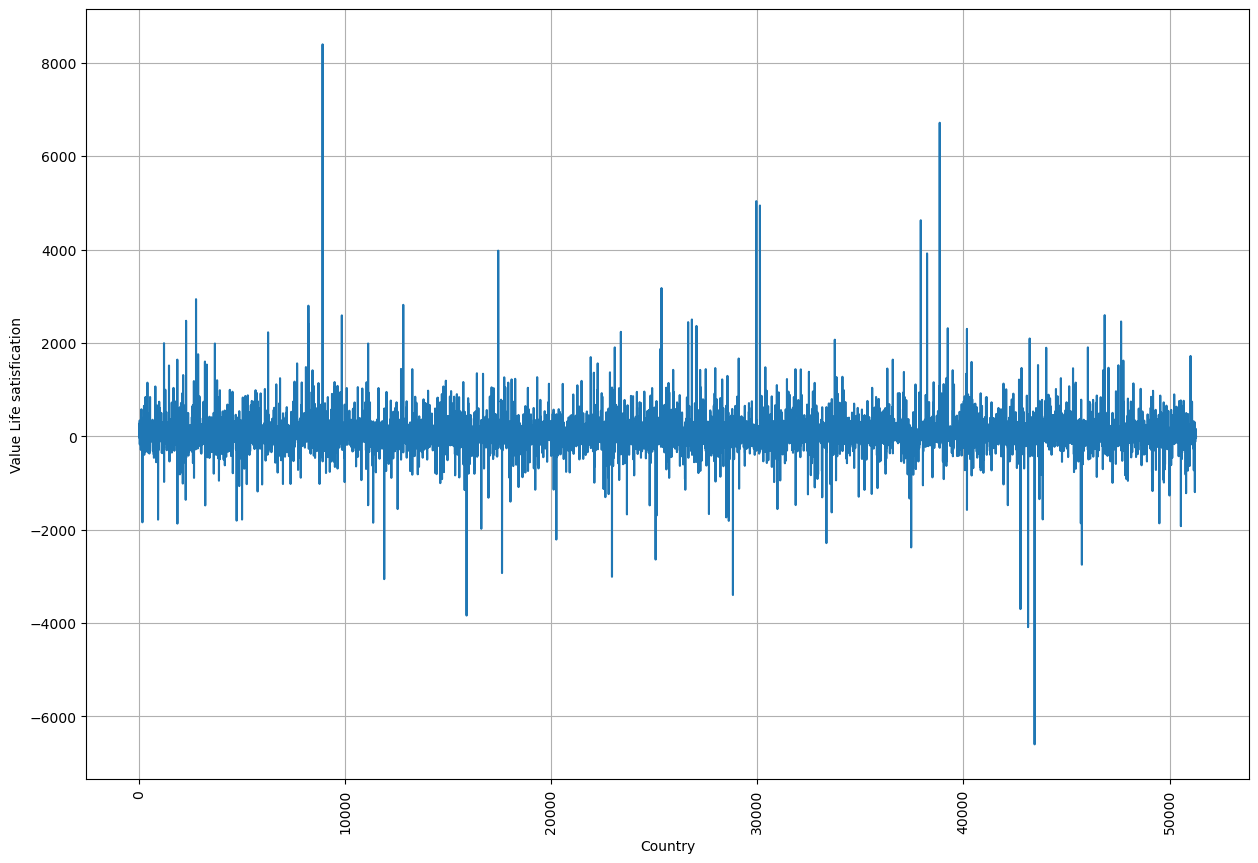

In [76]:
y = np.array(y)
t = np.array(data_sample.index.values)
plt.plot(t,y)
plt.grid(True)
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Value Life satisfication')
plt.show();

In [77]:
X_train, X_test,\
y_train, y_test = train_test_split(X, y,
                                    test_size=0.2,
                                    random_state=1,
                                    shuffle=True)

In [78]:
X_train.shape

(41032, 2)

In [79]:
# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)
print('Variance Train R2 score: {}'.format(reg.score(X_train, y_train))) # overfiiting = 1 

# variance score: 1 means perfect prediction
print('Variance Test R2 score: {}'.format(reg.score(X_test, y_test)))

LinearRegression()

Coefficients:  [ 0.21890339 -0.34570458]
Variance Train R2 score: 0.26154859058714197
Variance Test R2 score: 0.09709672895976085


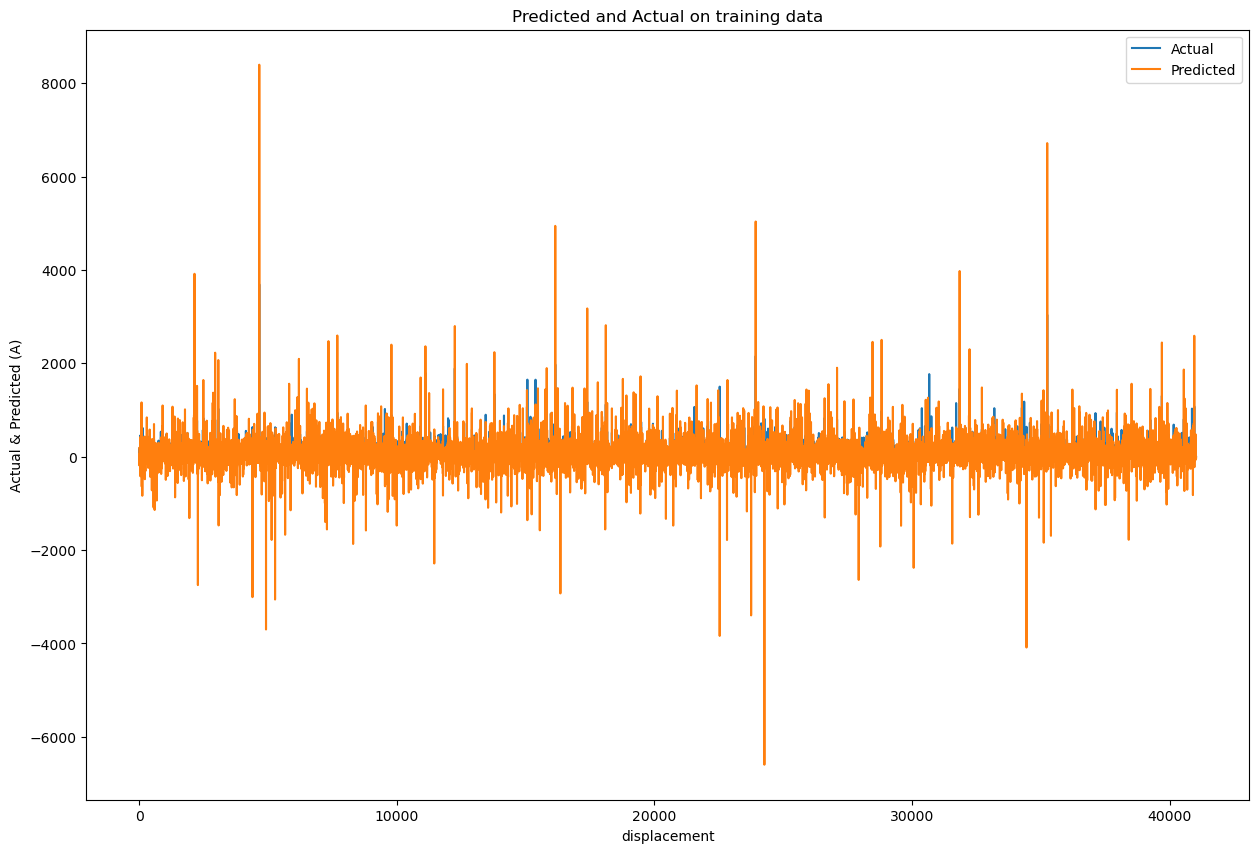

In [80]:
ytrain_pred = reg.predict(X_train)
plt.figure(figsize=(15,10))
plt.plot(t[:41032],ytrain_pred)
plt.plot(t[:41032],y_train)
plt.xlabel('displacement')
plt.ylabel('Actual & Predicted (A)')
plt.grid()

plt.legend(("Actual", "Predicted"));
plt.title("Predicted and Actual on training data")
plt.show();

In [81]:
RSS_train = np.mean((ytrain_pred-y_train)**2)/(np.std(y_train)**2)
RSS_train

0.7384514094128579

In [82]:
y_pred = reg.predict(X_test)

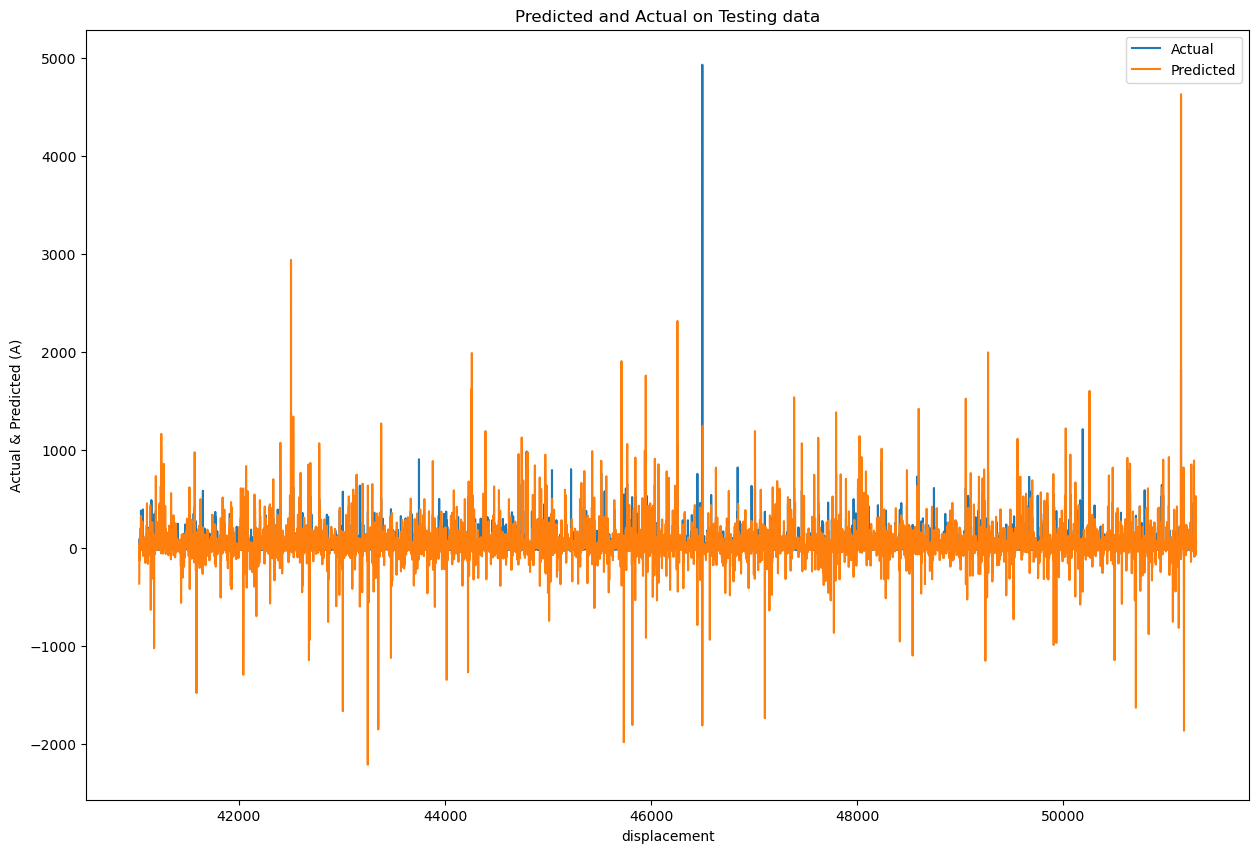

In [83]:
plt.figure(figsize=(15,10))
plt.plot(t[41032:],y_pred)
plt.plot(t[41032:],y_test)
plt.xlabel('displacement')
plt.ylabel('Actual & Predicted (A)')
plt.grid()
plt.legend(("Actual", "Predicted"));
plt.title("Predicted and Actual on Testing data");

In [84]:
RSS_test =np.mean((y_pred-y_test)**2)/(np.std(y_test)**2)
RSS_test

0.9029032710402393

In [85]:
print("The differnce betn. RSS test and RSS train is ", RSS_test-RSS_train)

The differnce betn. RSS test and RSS train is  0.16445186162738135


In [86]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('Coefficient of determination:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 57.05
Mean Squared Error: 24367.340971692476
Root Mean Squared Error: 156.10041951158388
Coefficient of determination: 0.09709672895976085
